<h2 style="color:green" align="center">Aprendizaje Automático con Python:
Regresión Lineal Simple y con Múltiples Variables</h2>

<h3 style="color:purple">Ejemplo de problema para predecir el precio de una vivienda en Monroe, Nueva Jersey (EE. UU.).</h3>

Ejemplo de problema para predecir el precio de una vivienda en Monroe, Nueva Jersey (EE. UU.).
A continuación se muestra una tabla con los precios de casas en Monroe Township, NJ.
Aquí, el precio depende del área (en pies cuadrados), del número de dormitorios y de la antigüedad de la casa (en años).
Dado este conjunto de datos, debemos predecir el precio de nuevas viviendas en función del área, los dormitorios y la antigüedad.

<img src="img/homepricetable.png" style="width:370px;height:250px">


Dado este conjunto de datos, debemos predecir el precio de nuevas viviendas en función del área, los dormitorios y la antigüedad.

---

Queremos calcular el precio de una vivienda que tenga:

* 3000 pies² de área, 3 dormitorios y 40 años de antigüedad
* 2500 pies² de área, 4 dormitorios y 5 años de antigüedad

---

Usaremos **regresión con múltiples variables**.
El precio puede calcularse mediante la siguiente ecuación:





<img src="img/scatterplot.png" style="width:600px;height:370px">

Si representamos los datos con un SCATTERPLOT,
obtenemos la siguiente gráfica en la que
podemos calcular de manera aproximada los
precios de cualquier casa siguiendo este modelo
lineal.

<img src="img/scatterplot2.png" style="width:600px;height:370px">

Pero … qué línea trazamos? Matemáticamente, la que minimice la suma de las
distancias entre los puntos y la línea.

<img src="img/minimizar_suma_distancias.png" >


Debemos saber que una ecuación lineal (recta) viene definida por:

<img src="img/ecuacion_lineal.png" >

* m: Pendiente de la recta
* b: Ordenada en el origen (altura que tiene la recta cuando x=0)

En Python lo llamamos ``coef_`` e ``intercept_``

In [620]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns


In [621]:
df = pd.read_csv('dataset/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000
6,3800,4.0,17,630000
7,2500,3.0,15,590000


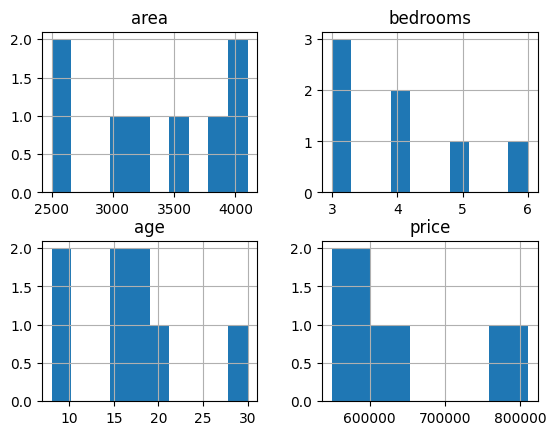

In [622]:
viz = df[['area','bedrooms','age','price']]
viz.hist()
plt.show()

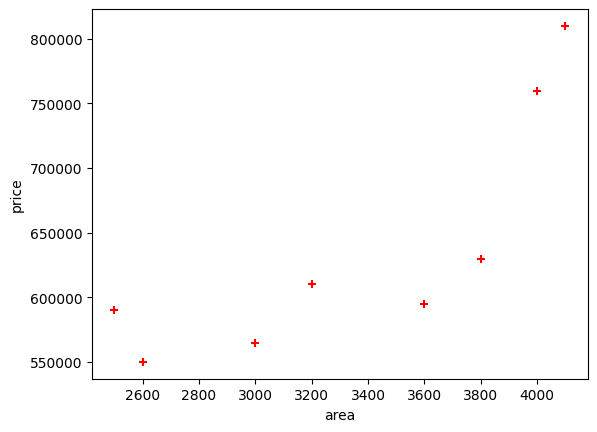

In [623]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [624]:
# Data Preprocessing: Fill NA values with median value of a column
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000
6,3800,4.0,17,630000
7,2500,3.0,15,590000


In [625]:
reg = linear_model.LinearRegression()
reg.fit(df.drop(['price', 'age','bedrooms'],axis='columns'),df.price)

LinearRegression()

In [626]:
reg.coef_

array([123.32089552])

In [627]:
reg.intercept_

np.float64(225625.00000000017)

**Predecir el precio de una casa con un área de 3000 metros cuadrados**

In [628]:
reg.predict([[3000]])

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([595587.68656716])

**Y = m * X + b (m es el coeficiente y b es el intercepto)**

In [629]:
3000*123.32089552 + 225625.00000000017

595587.6865600002

El problema planteado es un poco más complejo que el anterior: Tenemos un listado
de casas con información básica y queremos predecir el precio de estas según el
área, el número de habitaciones y la antigüedad de la casa.
1º) Debemos reemplazar el valor nulo (podemos
hacerlo por la mediana - la media da decimales- )
Podemos analizar los datos y ver el resultado gráfico de cada una de las variables
respecto al precio:

<img src="img/ecuacion_multivariable.png" >

Y adecuada a nuestro ejemplo:

<img src="img/ecuacion_multivariable2.png" >

En el ejemplo, price es la variable dependiente y área, bedrooms y age son las
variables independientes.

In [630]:
# df.corr()
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

price       1.000000
bedrooms    0.911894
area        0.807298
age        -0.699070
Name: price, dtype: float64


Para la aplicación de algoritmos de machine learning vamos a usar la librería Scikit-
learn (sklearn)
Dentro de esta librería, usaremos el modelo lineal:

In [631]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

El modelo lineal tiene los coeficientes de la línea de regresión que hemos hablado
anteriormente. Para conocerlos, podemos acceder a:

In [632]:
reg.coef_


array([   74.1076673 , 26229.5914003 , -4287.47398135])

In [633]:
reg.intercept_

np.float64(355778.3353766756)

Con este método (fit) lo que hacemos es entrenar al algoritmo con los valores de x
(área, bedrooms y age) e y (precio)

**Cual es el precio de una casa de 3000 metros cuadrados, 3 dormitorios y de 40 años de antiguedad**


In [634]:
reg.predict([[3000, 3, 40]])


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([485291.15223403])

In [635]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384


498408.25157402386

* Cual es el precio de una casa de 2500 metros cuadrados, 4 dormitorios y de 5 años de antiguedad


In [636]:
reg.predict([[2500, 4, 5]])


/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([624528.4993299])

<h3 style="color:purple">Generar un fichero CSV con la lista de predicciones de una serie de casas</h3>

In [637]:
area_df = pd.read_csv("dataset/homes.csv")
area_df.head(3)

,area,bedrooms,age
0,3526,6,21
1,3859,5,31
2,3260,4,31


In [638]:
p = reg.predict(area_df)
p

array([684422.56508227, 639996.08708051, 569376.00296541, 726884.97105872,
       558868.0077557 , 608733.42220068, 654337.64991021, 660691.09292578,
       666628.52898409, 449288.83208346, 617856.86122435, 558296.68786178,
       616857.91394597, 706012.67314878, 476781.4892646 ])

In [639]:
area_df['prices']=p
area_df

,area,bedrooms,age,prices
0,3526,6,21,684422.565082
1,3859,5,31,639996.087081
2,3260,4,31,569376.002965
3,3694,6,14,726884.971059
4,3530,3,32,558868.007756
5,3495,5,32,608733.422201
6,4124,3,20,654337.649910
7,3444,5,19,660691.092926
8,4038,6,34,666628.528984
9,2521,2,34,449288.832083


In [640]:
area_df.to_csv("dataset/prediction.csv")

## 🧩 Práctica: Predicción del Precio de Viviendas con Regresión Lineal Múltiple

### 📘 Objetivos de aprendizaje

Al finalizar esta práctica el alumnado será capaz de:

* Comprender el concepto de **regresión lineal múltiple**.
* Aplicar técnicas de **preprocesamiento de datos** (gestión de valores nulos, escalado, visualización).
* Entrenar un modelo predictivo con **Scikit-learn**.
* Interpretar los coeficientes del modelo.
* Realizar **predicciones** con nuevos datos.

#### 1️⃣ Introducción teórica breve

Explicación guiada del concepto de regresión lineal múltiple:

> La **regresión lineal múltiple** predice un valor continuo (como el precio de una casa) a partir de varias variables independientes, como el tamaño, la ubicación o la antigüedad.
> El modelo sigue la fórmula general:
>
> $
> \hat{y} = b + w_1x_1 + w_2x_2 + \dots + w_nx_n
> $

Donde:

* $ \hat{y} $ = precio estimado
* ($ b $ = intercepto (valor base)
* $ w_i $ = peso o influencia de cada característica
* $ x_i $ = variable independiente

---


#### 2️⃣ Cargar y explorar el dataset Housing.csv


**Tareas:**

* Comprobar si hay valores nulos (`df.isnull().sum()`).
* Verificar el tipo de cada variable (`df.dtypes`).
* Identificar cuáles son numéricas y cuáles categóricas.

In [641]:
df = pd.read_csv("dataset/housing.csv")
#  Hacemos una copia
df2 = df.copy()
#Comprobamos a ver si hay nulos o no
df2.isnull().sum()
df2.dtypes



longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

#### 3️⃣ Limpieza y preprocesamiento

* Completar valores faltantes con la **mediana** o **moda**.
* Codificar variables categóricas con `pd.get_dummies()` si las hay.
* Comprobar correlaciones con `df.corr()`.
* Normalización (Z-score)

In [642]:
#Rellenamos con la mediana los valores medianas (no lo habria hecho pk es equivalente al 1% de los datos)
df2['total_bedrooms'].fillna(df2['total_bedrooms'].median(), inplace=True)
df2.isnull().sum()
#Comprobamos que existen alguna variable categórica "ocean_proximity", las codificamos
df2 = pd.get_dummies(df2, columns=["ocean_proximity"],dtype=int)
df2.head(9)


/tmp/ipykernel_19691/219657862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['total_bedrooms'].fillna(df2['total_bedrooms'].median(), inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,0,0,0,1,0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0,0,0,1,0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,0,0,0,1,0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,0,0,0,1,0


In [643]:
df2.head(9)
#Hacemos la correlación
corr = df2.corr()
print(corr.to_string())


                            longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN
longitude                    1.000000 -0.924664           -0.108197     0.044568        0.069120    0.099773    0.055310      -0.015176           -0.045967                   0.321121               -0.055575                0.009446                 -0.474489                    0.045509
latitude                    -0.924664  1.000000            0.011173    -0.036100       -0.066484   -0.108785   -0.071035      -0.079809           -0.144160                  -0.446969                0.351166               -0.016572                  0.358771                   -0.160818
housing_median_age          -0.108197  0.011173            1.000000    -0.361262       -0.319026   -0.296244   -0.302916      -0.119034          

#### 4️⃣ Análisis visual

Crear gráficos para observar relaciones:

<Axes: >

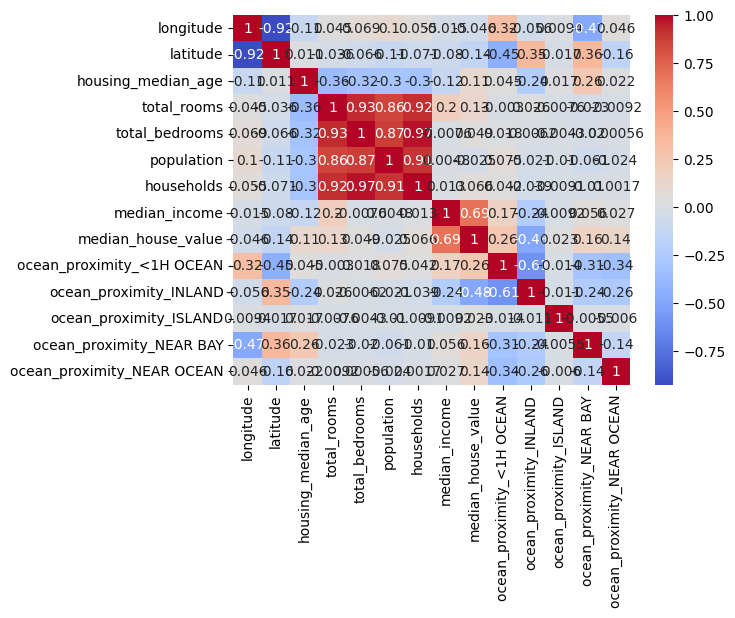

In [644]:
sns.heatmap(df2.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')

#### 5️⃣ Entrenamiento del modelo

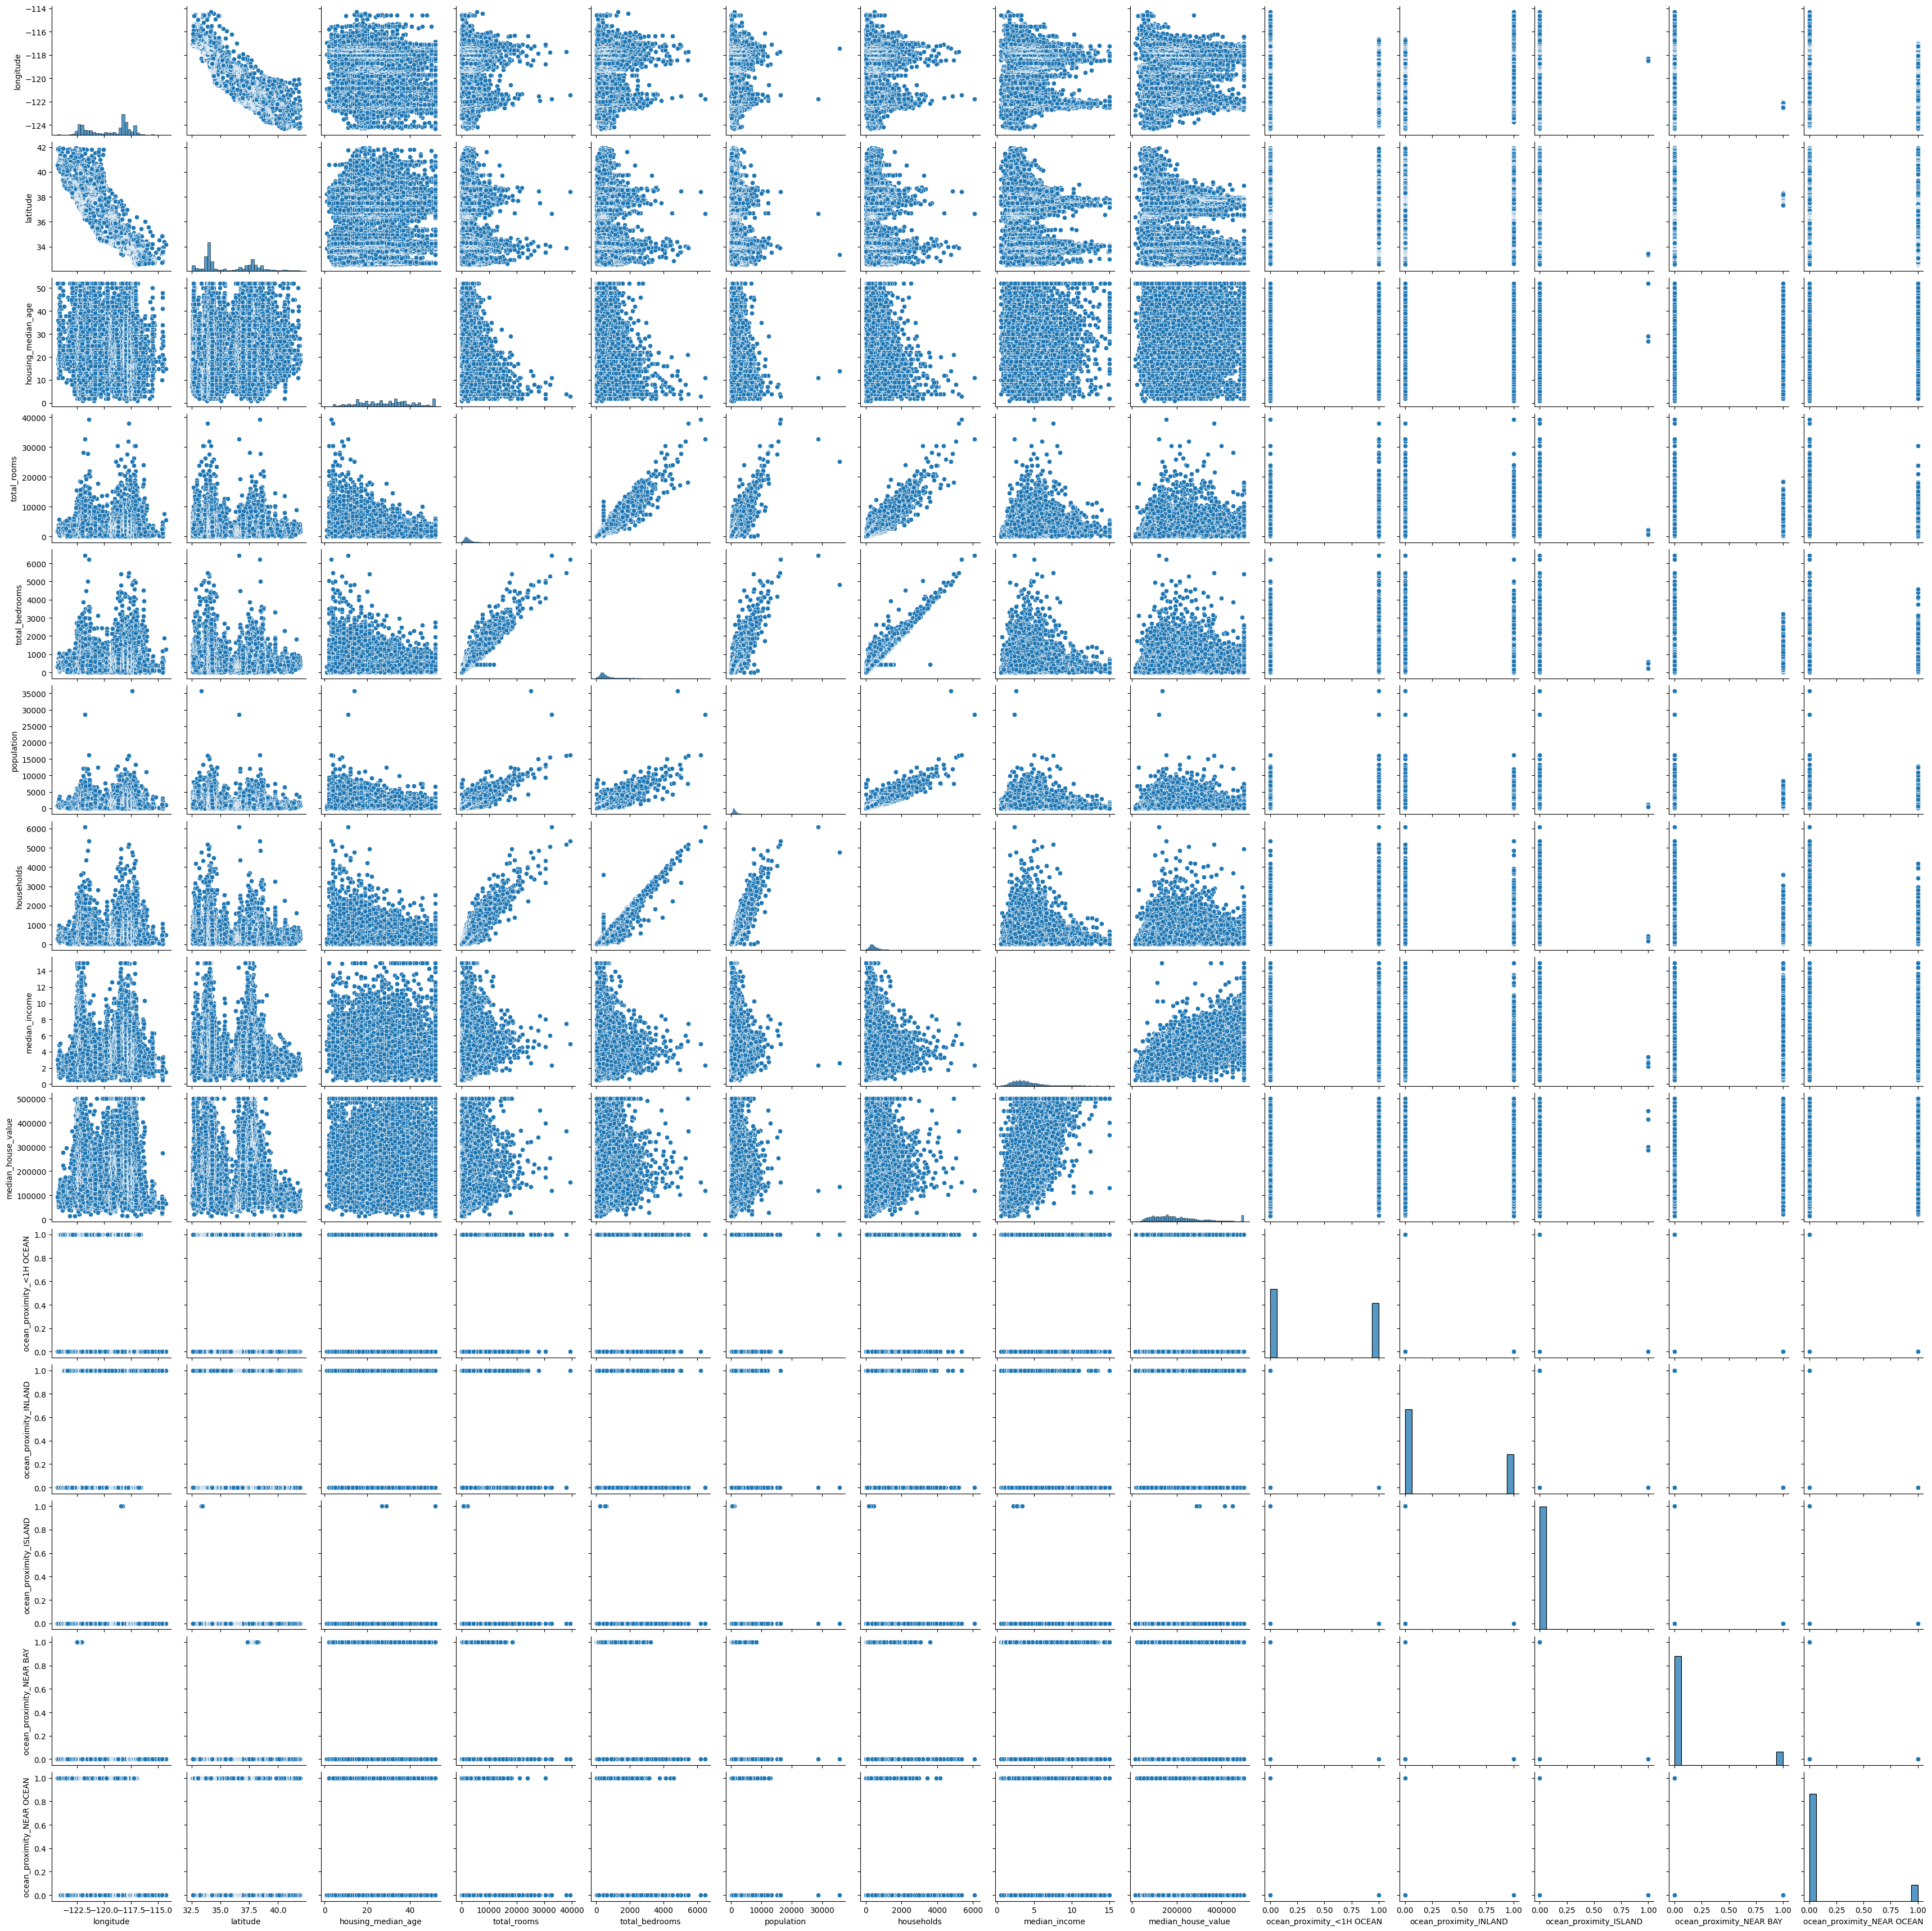

In [ ]:
#Creamos un dataframe con las unicas columnas que vamos a usar y creamos los datos para entrenamiento y test
df3 = df2[["median_house_value","median_income","ocean_proximity_<1H OCEAN"]]
msk = np.random.rand(len(df3)) < 0.8
train = df3[msk]
test = df3[~msk]
#ver la relacion, entre todas las columnas
sns.pairplot(df2)
#
train_x = np.asanyarray(train[["median_income","ocean_proximity_<1H OCEAN"]])
train_y = np.asanyarray(train["median_house_value"])
test_x = np.asanyarray(test[["median_income","ocean_proximity_<1H OCEAN"]])
test_y = np.asanyarray(test["median_house_value"])
#Normalizamos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(train_x)
x_test = scaler.transform(test_x)

#Creamos el objeto modelo
from sklearn.linear_model import LinearRegression
regr2 = linear_model.LinearRegression()
#Entrenamos
regr2.fit (x_train, train_y)
#Creamos la prediccion
y_pred = regr2.predict(x_test)





#### 6️⃣ Evaluación del modelo

In [646]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular los errores
mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Mostrar resultados
print(f"Error absoluto medio (MAE): {mae:,.2f}")
print(f"Error cuadrático medio (MSE): {mse:,.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error absoluto medio (MAE): 60,006.21
Error cuadrático medio (MSE): 6,470,735,486.58
Raíz del error cuadrático medio (RMSE): 80,440.88
Coeficiente de determinación (R²): 0.4993


In [ ]:
#lo hago con solo una variable independiente para ver si mejora con solo una.
#Creamos un dataframe con las unicas columnas que vamos a usar y creamos los datos para entrenamiento y test
df3 = df2[["median_house_value","median_income"]]
msk = np.random.rand(len(df3)) < 0.8
train = df3[msk]
test = df3[~msk]

train_x = np.asanyarray(train[["median_income"]])
train_y = np.asanyarray(train["median_house_value"])
test_x = np.asanyarray(test[["median_income"]])
test_y = np.asanyarray(test["median_house_value"])
#Normalizamos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(train_x)
x_test = scaler.transform(test_x)

#Creamos el objeto modelo
from sklearn.linear_model import LinearRegression
regr2 = linear_model.LinearRegression()
#Entrenamos
regr2.fit (x_train, train_y)
#Creamos la prediccion
y_pred = regr2.predict(x_test)


In [648]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular los errores
mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Mostrar resultados
print(f"Error absoluto medio (MAE): {mae:,.2f}")
print(f"Error cuadrático medio (MSE): {mse:,.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error absoluto medio (MAE): 63,057.86
Error cuadrático medio (MSE): 7,218,135,178.24
Raíz del error cuadrático medio (RMSE): 84,959.61
Coeficiente de determinación (R²): 0.4414


> * ¿Qué significa que el coeficiente de “edad” sea negativo?
> * ¿Qué valor de R² indicarías como “bueno” para este modelo?

#### 7️⃣ Predicción de nuevas viviendas

#### 8️⃣ Visualización del modelo (reto)

Mostrar cómo varía el precio según una variable (manteniendo fijas las demás):
